<a href="https://colab.research.google.com/github/Nwosu-Ihueze/bag_classifier/blob/main/better_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
img_dir = ('/content/drive/MyDrive/image_classifier/dataset')

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data_args = dict(rescale=1./255, validation_split=.20)

In [7]:
bag_train = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

train_gen = bag_train.flow_from_directory(
img_dir,
subset="training",
shuffle=True,
target_size=(224, 224))


bag_val = tf.keras.preprocessing.image.ImageDataGenerator(**data_args)

val_gen = bag_val.flow_from_directory(
img_dir,
subset="validation",
shuffle=True,
target_size=(224, 224))

Found 1600 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


In [8]:
for image_batch, label_batch in train_gen:
  break
  image_batch.shape, label_batch.shape

In [9]:
print (train_gen.class_indices)

{'Backpack': 0, 'Briefcase': 1, 'Duffle': 2, 'Handbag': 3, 'Purse': 4}


In [13]:
import tensorflow_hub as hub

In [15]:
model = tf.keras.Sequential([
 hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
 output_shape=[1280],
 trainable=False),
 tf.keras.layers.Dropout(0.4),
 tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(
 optimizer=optimizer,
 loss= 'categorical_crossentropy',
 metrics=['accuracy'])

In [19]:
epochs=10
history = model.fit(
  train_gen,
  validation_data = val_gen,
  epochs = epochs
)

Epoch 1/10
50/50 [==============================] - 378s 7s/step - loss: 1.5685 - accuracy: 0.3754 - val_loss: 0.6213 - val_accuracy: 0.7900
Epoch 2/10
50/50 [==============================] - 79s 2s/step - loss: 0.6672 - accuracy: 0.7653 - val_loss: 0.5209 - val_accuracy: 0.8125
Epoch 3/10
50/50 [==============================] - 78s 2s/step - loss: 0.5806 - accuracy: 0.7855 - val_loss: 0.5010 - val_accuracy: 0.8200
Epoch 4/10
50/50 [==============================] - 78s 2s/step - loss: 0.5084 - accuracy: 0.8201 - val_loss: 0.4706 - val_accuracy: 0.8225
Epoch 5/10
50/50 [==============================] - 78s 2s/step - loss: 0.4832 - accuracy: 0.8215 - val_loss: 0.4602 - val_accuracy: 0.8275
Epoch 6/10
50/50 [==============================] - 76s 2s/step - loss: 0.4559 - accuracy: 0.8360 - val_loss: 0.4589 - val_accuracy: 0.8200
Epoch 7/10
50/50 [==============================] - 77s 2s/step - loss: 0.3927 - accuracy: 0.8682 - val_loss: 0.4466 - val_accuracy: 0.8425
Epoch 8/10
50/50 [=

In [21]:
import matplotlib.pyplot as plt

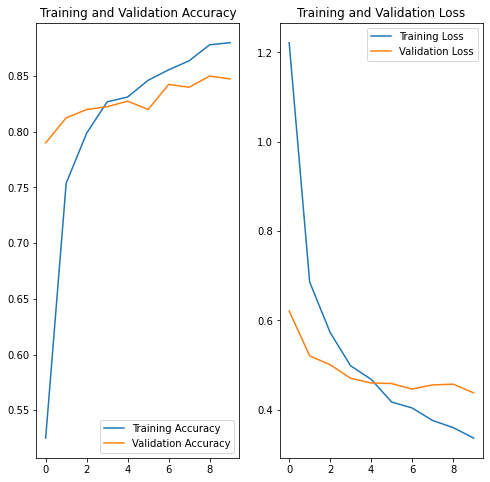

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
val_image_batch, val_label_batch = next(iter(val_gen))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [28]:
y_pred = model.predict(val_image_batch)
print("Prediction results shape:", y_pred.shape)

Prediction results shape: (32, 5)


In [29]:
dataset_labels = sorted(train_gen.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Backpack' 'Briefcase' 'Duffle' 'Handbag' 'Purse']


In [31]:
predicted_ids = np.argmax(y_pred, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Handbag' 'Purse' 'Backpack' 'Handbag' 'Handbag' 'Handbag' 'Backpack'
 'Purse' 'Duffle' 'Handbag' 'Duffle' 'Purse' 'Briefcase' 'Purse'
 'Backpack' 'Handbag' 'Purse' 'Duffle' 'Purse' 'Purse' 'Duffle'
 'Briefcase' 'Backpack' 'Purse' 'Handbag' 'Briefcase' 'Purse' 'Duffle'
 'Briefcase' 'Handbag' 'Duffle' 'Briefcase']


Prediction results shape: (32, 5)


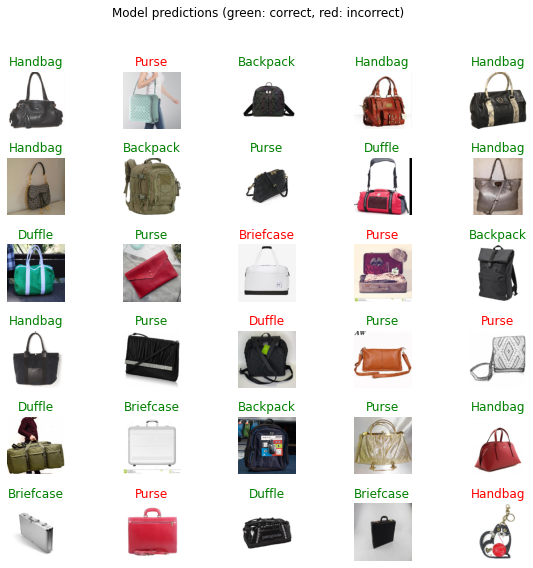

In [32]:
y_pred = model.predict(val_image_batch)
print("Prediction results shape:", y_pred.shape)
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [33]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets
